## 1. Load data from Database using SQL query

In [1]:
import pandas as pd
import psycopg2

conn = psycopg2.connect(host="localhost",database="bandit-nbs",port="5433",user="bandit",password="orF9YuPWVajej5tC6cfiro94BoxrzsoE")
cursor = conn.cursor()
cursor.execute("SELECT * FROM \"Transaction\"")
df = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])
cursor.close()
conn.close()

OperationalError: connection to server at "localhost" (::1), port 5433 failed: Connection refused (0x0000274D/10061)
	Is the server running on that host and accepting TCP/IP connections?
connection to server at "localhost" (127.0.0.1), port 5433 failed: Connection refused (0x0000274D/10061)
	Is the server running on that host and accepting TCP/IP connections?


In [2]:
df.head()

,Id,DebitBank,CreditBank,ClientId,ClientGender,ClientBirthDate,ClientAge,ClientMaritalStatus,ClientMonthlySalary,TransactionDate,MerchantActivity,AuthenticationMethod,TransferredAmount
0,46ec99c4-3af0-49d3-9d06-2dfed9797a9d,bandit-picsou,bandit-profit,8b6ed1a0-dedc-43f4-99fe-7fd7e9fc1b7a,Female,2000-10-07 12:27:24+00:00,87,Married,4677,2023-02-13 10:08:55.453940+00:00,Trading Cards,ID,50
1,b3fa1458-7f4b-44a2-900d-7dae2b86a658,bandit-picsou,bandit-picsou,06ce72c0-6c99-4004-8978-0b46a8cbe3f3,Male,2000-10-25 11:23:59+00:00,27,Single,2923,2023-03-27 17:40:52.295790+00:00,Trading Cards,OTP,47
2,266998a4-c43a-4273-ba40-c074c25f9cc7,bandit-profit,bandit-picsou,4ff01ed7-6345-44cd-a5f0-777d515251aa,Female,1978-11-02 01:25:26+00:00,30,Single,3675,2023-05-17 18:26:03.148998+00:00,Dachshunds,OTP,356
3,198825ee-c648-44c6-9995-866f0d1b7b50,bandit-profit,bandit-picsou,373931ef-a480-4753-a2a8-e3367c6fbbd7,Male,1930-08-25 09:49:25+00:00,52,Married,3963,2023-05-14 17:51:23.438874+00:00,Dachshunds,OTP,302
4,bf0bce5f-659f-43a2-b772-129f6b67de1a,bandit-donsaluste,bandit-profit,30afc1eb-b472-48df-9558-7040602bf88f,Female,1980-10-12 03:29:08+00:00,60,Divorced,4653,2023-04-27 05:56:57.267449+00:00,Dachshunds,SMS,515


In [3]:
samples = df[["ClientAge"]].values
labels = df[["ClientMonthlySalary"]].values

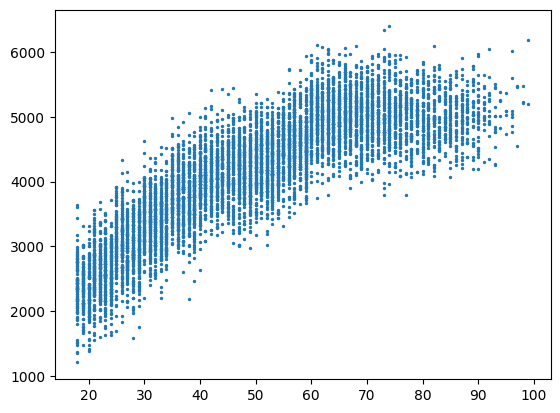

In [26]:
import matplotlib.pyplot as plt

plt.scatter(samples, labels, s=2)

In [5]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
samples_normalized = scaler.fit_transform(samples)
labels_normalized = scaler.fit_transform(labels)

In [8]:
import quark

ff_model = quark.Model("RecursiveFeedForward")

ff_sample = samples_normalized.tolist()
ff_labels = labels_normalized.tolist()

ff_l1 = quark.Layer("Gradient", 2, 1, 0.01, "Sigmoid", 1, True)
ff_l2 = quark.Layer("Gradient", 1, 2, 0.01, "Linear", 1, True)
ff_model.push_layer(ff_l1)
ff_model.push_layer(ff_l2)

ff_model.fit(ff_sample, ff_labels, 100, 0.001)

Minimum atteint: 0.003305478471536306


Text(0, 0.5, 'Mean Square Error')

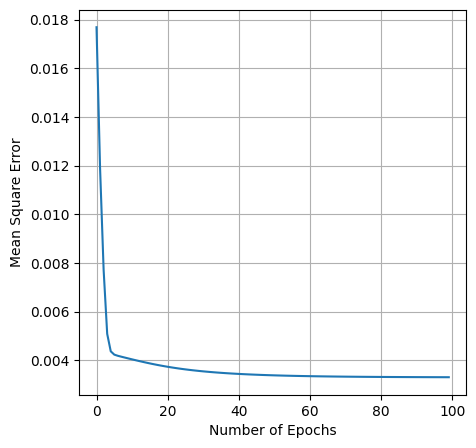

In [10]:
import matplotlib.pyplot as plt

mse = ff_model.mse
print(f"Minimum atteint: {min(mse)}")
len(mse)

plt.figure(figsize=(5, 5))
plt.plot(range(len(mse)), mse)
plt.grid()

plt.xlabel("Number of Epochs")
plt.ylabel("Mean Square Error")

In [18]:
predictions = [ff_model.predict([x]) for x in samples_normalized]

Text(0, 0.5, 'Salary')

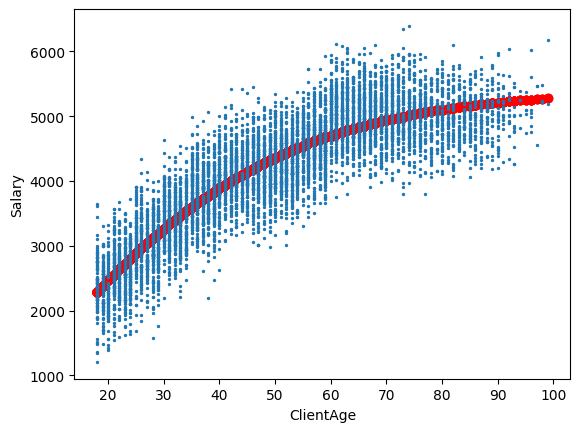

In [27]:
import matplotlib.pyplot as plt
import numpy as np

plt.scatter(samples, scaler.inverse_transform(predictions), c="red")
plt.scatter(samples, labels, s=2)

plt.xlabel("ClientAge")
plt.ylabel("Salary")